In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
import numpy as np
import matplotlib.pyplot as plt

首先，定义本实验中有用的排序补零函数：

In [2]:
def ZeroPad(F1, K2):
    KT = np.sort(F1[1])
    I = np.argsort(F1[1])
    K = np.sort(K2)
    if KT[0] < K[0] or KT[len(KT)-1] > K[len(K)-1]:
        print("Range of K2 must not less than that of K1.")
        exit(1)
    Id = np.zeros(len(KT),dtype=np.int)
    for J in range(0,len(KT)):
        Id[J]=np.nonzero(K==KT[J])[0]
    F = np.zeros(len(K))
    F0=F1[0]
    F[Id] = F0[I]
    return (F,K)

## 1

先定义以下的函数:

In [3]:
def MyShift(x,n0):
    xt = x[0]
    nt = x[1]+n0
    return (xt,nt)

def MyFlip(x):
    n1 = -x[1]
    xt = (x[0],n1)    
    xtt = ZeroPad(xt,n1)
    return xtt

def MyDiff(x):
    n1 = x[1]
    xt = ZeroPad(x,n1)
    n1 = xt[1]
    n2 = np.insert(n1,0,n1[0]-1)
    n3 = np.insert(n2,len(n2),n1[len(n1)-1]+1)
    xtt = ZeroPad(xt,n3)
    y = np.diff(xtt[0])
    ny = np.delete(xtt[1],0)
    return (y,ny)

def MySum(x):
    xt = np.cumsum(x[0])
    nt = x[1]
    return (xt,nt)

def MyConv(x1,x2):
    xt = np.convolve(x1[0],x2[0])
    nt0 = x1[1][0]+x2[1][0]
    nt = np.arange(nt0,nt0+len(xt),dtype=np.int)
    return(xt,nt)

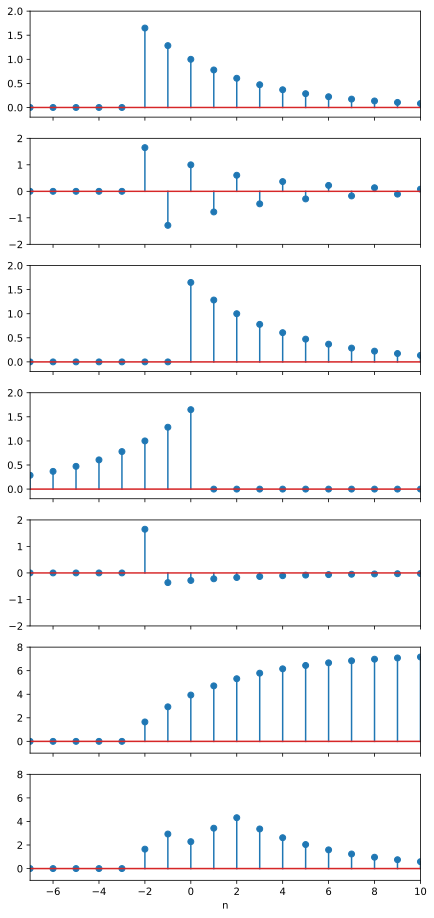

In [4]:
n = np.arange(-2,13,dtype=int)
x = np.exp(-n/4.)
n1 = np.arange(-18,18,dtype=int)

xa=(x,n)
xb=(xa[0]*np.cos(5*np.pi*xa[1]), xa[1])
xc = MyShift(xa,2)
xd = MyFlip(xc)
xe = MyDiff(xa)
xf = MySum(xa)
xg = MyConv(xa, ([1,1,0,1,1],np.arange(0,5,dtype=int)))

fig, ax = plt.subplots(7,1,sharex=True,figsize=(7.0, 16.0))
xt = ZeroPad(xa,n1)
ax[0].stem(xt[1],xt[0])
ax[0].axis([-7,10,-0.2,2])

xt = ZeroPad(xb,n1)
ax[1].stem(xt[1],xt[0])
ax[1].axis([-7,10,-2,2])

xt = ZeroPad(xc,n1)
ax[2].stem(xt[1],xt[0])
ax[2].axis([-7,10,-0.2,2])

xt = ZeroPad(xd,n1)
ax[3].stem(xt[1],xt[0])
ax[3].axis([-7,10,-0.2,2])

xt = ZeroPad(xe,n1)
ax[4].stem(xt[1],xt[0])
ax[4].axis([-7,10,-2,2])

xt = ZeroPad(xf,n1)
ax[5].stem(xt[1],xt[0])
ax[5].axis([-7,10,-1,8])

xt = ZeroPad(xg,n1)
ax[6].stem(xt[1],xt[0])
ax[6].axis([-7,10,-1,8])
dummy = ax[6].set_xlabel('n')

## 2

程序如下:

需要定义一个能返回复数的补零函数：

In [5]:
def CZeroPad(F1, K2):
    KT = np.sort(F1[1])
    I = np.argsort(F1[1])
    K = np.sort(K2)
    if KT[0] < K[0] or KT[len(KT)-1] > K[len(K)-1]:
        print("Range of K2 must not less than that of K1.")
        exit(1)
    Id = np.zeros(len(KT),dtype=np.int)
    for J in range(0,len(KT)):
        Id[J]=np.nonzero(K==KT[J])[0]
    F = np.zeros(len(K),dtype=complex)
    F0=F1[0]
    F[Id] = F0[I]
    return (F,K)

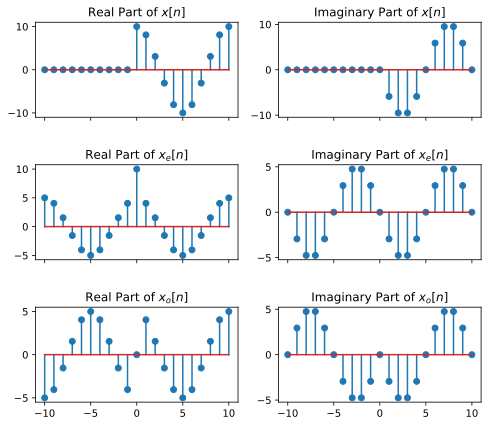

In [6]:
n = np.arange(0,11,dtype=int)
x = 10*np.exp(-1.0j*0.2*np.pi*n)
n1 = np.arange(-10,11,dtype=int)

xn = (x,n)
xf = (x,-n)

xt = CZeroPad(xn,n1)
xft = CZeroPad(xf,n1)

xe = (xt[0]+np.conj(xft[0]))/2
xo = (xt[0]-np.conj(xft[0]))/2

fig, ax = plt.subplots(3,2,sharex=True,figsize=(8.0, 7.0))
ax[0,0].stem(n1,xt[0].real)
ax[0,0].set_title('Real Part of $x[n]$')
ax[0,1].stem(n1,xt[0].imag)
ax[0,1].set_title('Imaginary Part of $x[n]$')
ax[1,0].stem(n1,xe.real)
ax[1,0].set_title('Real Part of $x_e[n]$')
ax[1,1].stem(n1,xe.imag)
ax[1,1].set_title('Imaginary Part of $x_e[n]$')
ax[2,0].stem(n1,xo.real)
ax[2,0].set_title('Real Part of $x_o[n]$')
ax[2,1].stem(n1,xo.imag)
ax[2,1].set_title('Imaginary Part of $x_o[n]$')
fig.subplots_adjust(hspace=0.5)

可以看出序列的共轭对称分量的实部为偶函数，虚部为奇函数；而共轭反对称分量则相反，实部为奇函数，虚部为偶函数。

## 3

本题实际上是用梯形公式来求定积分的近似解，程序如下：

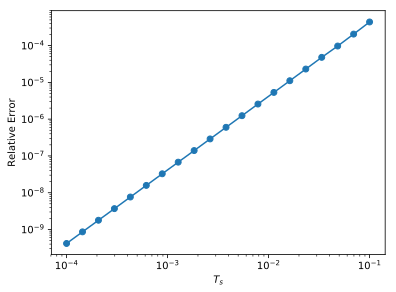

In [7]:
Ts = np.logspace(-1,-4,num=20);
x = np.zeros(len(Ts))
for K in range(0,len(Ts)):
    T = Ts[K]
    m = np.floor(np.pi/T)
    t = T*(np.arange(0,m)+0.5)
    x[K] = T*np.sum(t*np.cos(t))
    x[K] = x[K]+(np.pi-m*T)*0.5*(np.pi+m*T)*np.cos(0.5*(np.pi+m*T))
r = -2
fig, ax = plt.subplots(figsize=(6.0, 4.5))
ax.plot(Ts,np.abs((x-r)/r))
ax.scatter(Ts,np.abs((x-r)/r))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$T_s$')
dummy = ax.set_ylabel('Relative Error')

其中第8行的作用是加上剩余的$t \in [mT_s,\pi]$区间的积分值。显然$T_s$取得越小，结果越准确。

## 4

程序如下：

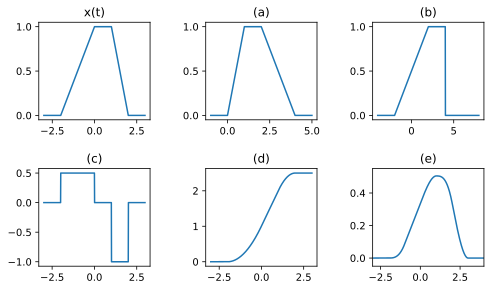

In [8]:
Ts = 1.e-2
t = np.arange(-3,3,Ts)
x = (t/2+1)*((t>=-2)*1-(t>=0)*1) + ((t>=0)*1-(t>=1)*1) + (-t+2)*((t>=1)*1-(t>=2)*1)

ta = -t+2

tb = 2*(t+1)
xb = x*((tb<=4)*1)

tc = np.delete(t,0)
xc = np.diff(x)/Ts

xd = np.cumsum(x)*Ts

h = t*(((t>=0)*1-(t>=1)*1))
xe = np.convolve(x,h)*Ts
te = t[0]+t[0]+np.arange(0,len(xe))*Ts

fig, ax = plt.subplots(2,3,figsize=(8.0, 4.5))
ax[0,0].plot(t,x)
ax[0,0].set_title('x(t)')
ax[0,1].plot(ta,x)
ax[0,1].set_title('(a)')
ax[0,2].plot(tb,xb)
ax[0,2].set_title('(b)')
ax[1,0].plot(tc,xc)
ax[1,0].set_title('(c)')
ax[1,1].plot(t,xd)
ax[1,1].set_title('(d)')
ax[1,2].plot(te,xe)
ax[1,2].set_title('(e)')
ax[1,2].axis([-3,4,-0.05,0.55])
fig.subplots_adjust(hspace=0.5,wspace=0.5)